In [1]:
import numpy as np
import matplotlib.pyplot as plt
#from kmeans import plot_k_means, get_simple_data, cost

In [2]:
def d(u, v):
    diff = u - v
    return diff.dot(diff)

In [3]:
def cost(X, R, M):
    cost = 0
    for k in range(len(M)):
        # method 1
        # for n in range(len(X)):
        #     cost += R[n,k]*d(M[k], X[n])

        # method 2
        diff = X - M[k]
        sq_distances = (diff * diff).sum(axis=1)
        cost += (R[:,k] * sq_distances).sum()
    return cost

In [4]:
def plot_k_means(X, K, max_iter=20, beta=1.0, show_plots=True):
    N, D = X.shape
    M = np.zeros((K, D))
    # R = np.zeros((N, K))
    exponents = np.empty((N, K))

    # initialize M to random
    for k in range(K):
        M[k] = X[np.random.choice(N)]

    costs = np.zeros(max_iter)
    for i in range(max_iter):
        # step 1: determine assignments / resposibilities
        # is this inefficient?
        for k in range(K):
            for n in range(N):
                # R[n,k] = np.exp(-beta*d(M[k], X[n])) / np.sum( np.exp(-beta*d(M[j], X[n])) for j in range(K) )
                exponents[n,k] = np.exp(-beta*d(M[k], X[n]))

        R = exponents / exponents.sum(axis=1, keepdims=True)
        # assert(np.abs(R - R2).sum() < 1e-10)

        # step 2: recalculate means
        for k in range(K):
            M[k] = R[:,k].dot(X) / R[:,k].sum()

        costs[i] = cost(X, R, M)
        if i > 0:
            if np.abs(costs[i] - costs[i-1]) < 1e-5:
                break

    if show_plots:
        plt.plot(costs)
        plt.title("Costs")
        plt.show()

        random_colors = np.random.random((K, 3))
        colors = R.dot(random_colors)
        plt.scatter(X[:,0], X[:,1], c=colors)
        plt.show()

    return M, R

In [5]:
def get_simple_data():
    # assume 3 means
    D = 2 # so we can visualize it more easily
    s = 4 # separation so we can control how far apart the means are
    mu1 = np.array([0, 0])
    mu2 = np.array([s, s])
    mu3 = np.array([0, s])

    N = 900 # number of samples
    X = np.zeros((N, D))
    X[:300, :] = np.random.randn(300, D) + mu1
    X[300:600, :] = np.random.randn(300, D) + mu2
    X[600:, :] = np.random.randn(300, D) + mu3
    return X

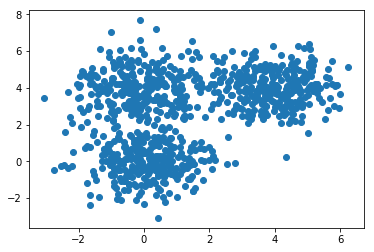

In [6]:
X = get_simple_data()
plt.scatter(X[:,0], X[:,1])
plt.show()

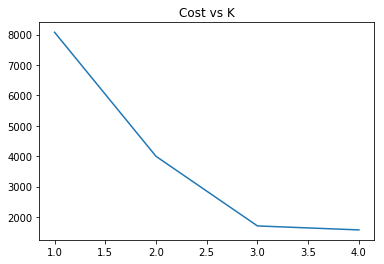

In [10]:
clusters = 5

# Initialize an empty list
costs = np.empty(clusters)
costs[0] = None
 
for k in range(1, clusters):
    # Get back the means M and responsabilities R
    M, R = plot_k_means(X, k, show_plots=False)
    
    # Calculate the costs 
    c = cost(X, R, M)
    
    # Store the costs
    costs[k] = c

plt.plot(costs)
plt.title("Cost vs K")
plt.show()

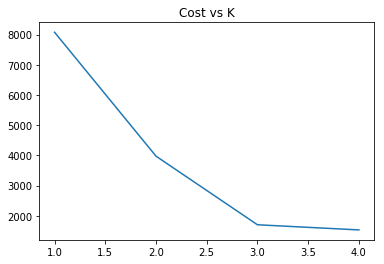

In [11]:
clusters = 5

# Initialize an empty list
costs = np.empty(clusters)
costs[0] = None
 
for k in range(1, clusters):
    # Get back the means M and responsabilities R
    M, R = plot_k_means(X, k, show_plots=False)
    
    # Calculate the costs 
    c = cost(X, R, M)
    
    # Store the costs
    costs[k] = c

plt.plot(costs)
plt.title("Cost vs K")
plt.show()

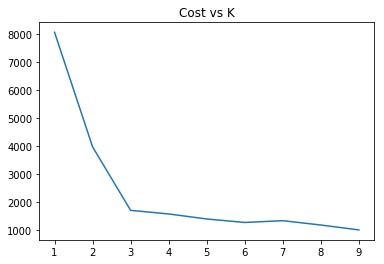

In [19]:
clusters = 10

# Initialize an empty list
costs = np.empty(clusters)
costs[0] = None
 
for k in range(1, clusters):
    M, R = plot_k_means(X, k, show_plots=False)
    c = cost(X, R, M)
    costs[k] = c

plt.plot(costs)
plt.title("Cost vs K")
plt.show()

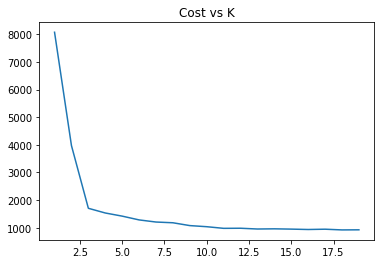

In [20]:
clusters = 20

# Initialize an empty list
costs = np.empty(clusters)
costs[0] = None
 
for k in range(1, clusters):
    M, R = plot_k_means(X, k, show_plots=False)
    c = cost(X, R, M)
    costs[k] = c

plt.plot(costs)
plt.title("Cost vs K")
plt.show()